# Removing small range cycles from reversals by racetrack filtering
This notebook demonstrates how to apply the racetrack filter to remove reversals from a signal which has rainflow cycles below a certain threshold by keeping the reversal sequence intact

In [1]:
import fatpack
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(10)
print(fatpack.__version__)

0.6.3


First we generate a signal for the example

In [2]:
y = np.random.normal(size=100000)*10.

Reverals (peaks and valleys) can be extracted with and without a racetrack filter with fatpack, here we remove all reversals that produce a rainflow cycle below h=15.

In [3]:
rev, ix = fatpack.find_reversals(y, k=256)
rev_rtf, ix_rtf = fatpack.find_reversals_racetrack_filtered(y, h=20, k=256)

We can then plot the results, we see that the reversals which produce small rainflow ranges are removed from the filtered reversals

(30, 100)

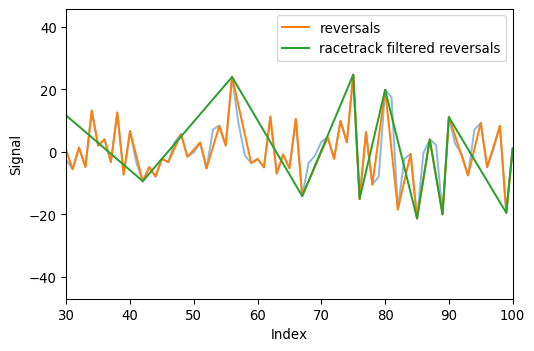

In [4]:
plt.figure(dpi=96)
plt.plot(y, alpha=.5)
plt.plot(ix, rev, label='reversals')
plt.plot(ix_rtf, rev_rtf, label='racetrack filtered reversals')
plt.legend(loc='best')
plt.xlabel("Index")
plt.ylabel("Signal")
plt.xlim(30, 100)

we can verify that all ranges below h=20 are removed by taking a look at the range-count plot or range-cumulative count plot. 

Text(0, 0.5, 'Count')

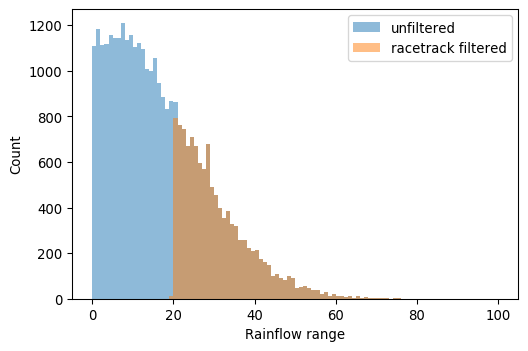

In [5]:
ranges = fatpack.find_rainflow_ranges(rev, k=256)
ranges_rtf = fatpack.find_rainflow_ranges(rev_rtf, k=256)
bins = np.linspace(0, 100, 101)
N, S = fatpack.find_range_count(ranges, bins)
N_rtf, S_rtf = fatpack.find_range_count(ranges_rtf, bins)

plt.figure(dpi=96)
plt.bar(S, N, alpha=.5, width=1, label="unfiltered")
plt.bar(S_rtf, N_rtf, alpha=.5, width=1, label="racetrack filtered")
plt.legend()
plt.xlabel("Rainflow range")
plt.ylabel("Count")

Text(0, 0.5, 'Rainflow range')

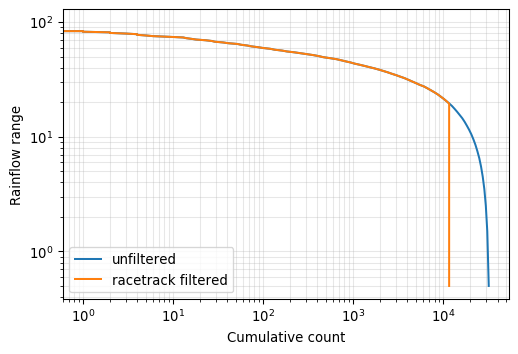

In [6]:
Ncum = N.sum() - np.cumsum(N)
Ncum_rtf = N_rtf.sum() - np.cumsum(N_rtf)

plt.figure(dpi=96)
plt.loglog(Ncum, S, label="unfiltered")
plt.loglog(Ncum_rtf, S_rtf, label="racetrack filtered")
plt.legend()
plt.grid(which='both', alpha=.3)
plt.xlabel("Cumulative count")
plt.ylabel("Rainflow range")


The racetrack filter has removed all rainflow ranges below 20.